# K-Means Clustering

What is Clustering?
Let’s kick things off with a simple example. A bank wants to give credit card offers to its customers. Currently, they look at the details of each customer and based on this information, decide which offer should be given to which customer.

Now, the bank can potentially have millions of customers. Does it make sense to look at the details of each customer separately and then make a decision? Certainly not! It is a manual process and will take a huge amount of time.

So what can the bank do? One option is to segment its customers into different groups. For instance, the bank can group the customers based on their income into High income, Average Income, Low Income groups

The groups I mentioned above are known as clusters and the process of creating these groups is known as clustering.

Such problems, without any fixed target variable, are known as unsupervised learning problems. In these problems, we only have the independent variables and no target/dependent variable.

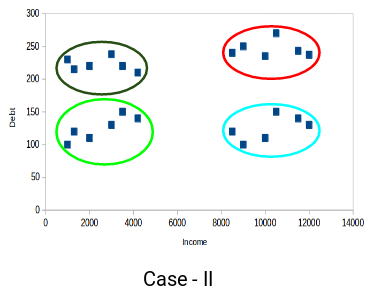


Applications of Clustering in Real-World Scenarios

Clustering is a widely used technique in the industry. It is actually being used in almost every domain, ranging from banking to recommendation engines, document clustering to image segmentation.

Customer Segmentation

We covered this earlier – one of the most common applications of clustering is customer segmentation. And it isn’t just limited to banking. This strategy is across functions, including telecom, e-commerce, sports, advertising, sales, etc.

Document Clustering

This is another common application of clustering. Let’s say you have multiple documents and you need to cluster similar documents together. Clustering helps us group these documents such that similar documents are in the same clusters.

Image Segmentation

We can also use clustering to perform image segmentation. Here, we try to club similar pixels in the image together. We can apply clustering to create clusters having similar pixels in the same group.

Recommendation Engines

Clustering can also be used in recommendation engines. Let’s say you want to recommend songs to your friends. You can look at the songs liked by that person and then use clustering to find similar songs and finally recommend the most similar songs.



Understanding the Different Evaluation Metrics for Clustering
The primary aim of clustering is not just to make clusters, but to make good and meaningful ones.
Inertia
Recall the first property of clusters we covered above. This is what inertia evaluates. It tells us how far the points within a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

We calculate this for all the clusters and the final inertial value is the sum of all these distances. This distance within the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances:
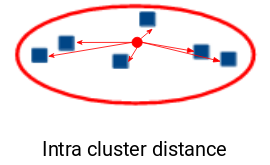

Now, what do you think should be the value of inertia for a good cluster? Is a small inertial value good or do we need a larger value? We want the points within the same cluster to be similar to each other, right? Hence, the distance between them should be as low as possible.

Dunn Index
We now know that inertia tries to minimize the intracluster distance. It is trying to make more compact clusters.

Let me put it this way – if the distance between the centroid of a cluster and the points in that cluster is small, it means that the points are closer to each other. So, inertia makes sure that the first property of clusters is satisfied. But it does not care about the second property – that different clusters should be as distance from each other as possible.

This is where Dunn index can come into action.

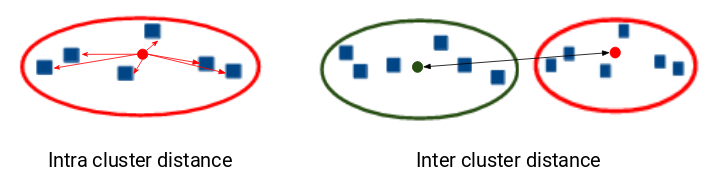

Along with the distance between the centroid and points, the Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different clusters is known as inter-cluster distance. Let’s look at the formula of the Dunn index:

Dunn index = max(inter cluster distance) / min(intra cluster distance)

We want to maximize the Dunn index. The more the value of the Dunn index, the better will be the clusters.

<b><font color=blue>
The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.</b></font>

Stopping Criteria for K-Means Clustering<br>
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:<br>

Centroids of newly formed clusters do not change<br>
Points remain in the same cluster<br>
Maximum number of iterations are reached<br>
We can stop the algorithm if the centroids of newly formed clusters are not changing. Even after multiple iterations, if we are getting the same centroids for all the clusters, we can say that the algorithm is not learning any new pattern and it is a sign to stop the training.<br>



Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('Loan_Prediction.csv')
data.head()

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

Here, we are stopping the training when the centroids are not changing after two iterations. We have initially defined the diff as 1 and inside the while loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

When this difference is 0, we are stopping the training. Let’s now visualize the clusters we have got

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()